In [1]:
# Follow the steps from https://www.kaggle.com/madz2000/cnn-s-using-vgg16-83-accuracy

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.applications import MobileNet, VGG16
import cv2
import os
import random
import tensorflow as tf

Using TensorFlow backend.


In [2]:
# Walk through the input data files available in the "flowers" directory.

import os
for dirname, _, filenames in os.walk('flowers'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

flowers\daisy\100080576_f52e8ee070_n.jpg
flowers\daisy\10140303196_b88d3d6cec.jpg
flowers\daisy\10172379554_b296050f82_n.jpg
flowers\daisy\10172567486_2748826a8b.jpg
flowers\daisy\10172636503_21bededa75_n.jpg
flowers\daisy\102841525_bd6628ae3c.jpg
flowers\daisy\10300722094_28fa978807_n.jpg
flowers\daisy\1031799732_e7f4008c03.jpg
flowers\daisy\10391248763_1d16681106_n.jpg
flowers\daisy\10437754174_22ec990b77_m.jpg
flowers\daisy\10437770546_8bb6f7bdd3_m.jpg
flowers\daisy\10437929963_bc13eebe0c.jpg
flowers\daisy\10466290366_cc72e33532.jpg
flowers\daisy\10466558316_a7198b87e2.jpg
flowers\daisy\10555749515_13a12a026e.jpg
flowers\daisy\10555815624_dc211569b0.jpg
flowers\daisy\10555826524_423eb8bf71_n.jpg
flowers\daisy\10559679065_50d2b16f6d.jpg
flowers\daisy\105806915_a9c13e2106_n.jpg
flowers\daisy\10712722853_5632165b04.jpg
flowers\daisy\107592979_aaa9cdfe78_m.jpg
flowers\daisy\10770585085_4742b9dac3_n.jpg
flowers\daisy\10841136265_af473efc60.jpg
flowers\daisy\10993710036_2033222c91.jpg
flo

flowers\dandelion\10043234166_e6dd915111_n.jpg
flowers\dandelion\10200780773_c6051a7d71_n.jpg
flowers\dandelion\10294487385_92a0676c7d_m.jpg
flowers\dandelion\10437652486_aa86c14985.jpg
flowers\dandelion\10443973_aeb97513fc_m.jpg
flowers\dandelion\10477378514_9ffbcec4cf_m.jpg
flowers\dandelion\10486992895_20b344ce2d_n.jpg
flowers\dandelion\10617162044_8740d4dd9f_n.jpg
flowers\dandelion\10617191174_9a01753241_n.jpg
flowers\dandelion\10683189_bd6e371b97.jpg
flowers\dandelion\1074999133_1e4a1e042e.jpg
flowers\dandelion\10777398353_5a20bb218c.jpg
flowers\dandelion\10778387133_9141024b10.jpg
flowers\dandelion\10779476016_9130714dc0.jpg
flowers\dandelion\1080179756_5f05350a59.jpg
flowers\dandelion\10828951106_c3cd47983f.jpg
flowers\dandelion\10919961_0af657c4e8.jpg
flowers\dandelion\10946896405_81d2d50941_m.jpg
flowers\dandelion\11124381625_24b17662bd_n.jpg
flowers\dandelion\1128626197_3f52424215_n.jpg
flowers\dandelion\11296320473_1d9261ddcb.jpg
flowers\dandelion\11405573_24a8a838cc_n.jpg
f

flowers\rose\18486123042_5c8da68f38_n.jpg
flowers\rose\18486124712_17ebe7559b_n.jpg
flowers\rose\18486146942_e09ecd0e25_n.jpg
flowers\rose\18486151112_6f83e92223_n.jpg
flowers\rose\18486171962_c46dbd067d_n.jpg
flowers\rose\18490508225_0fc630e963_n.jpg
flowers\rose\18492288871_8c9d5657bb_n.jpg
flowers\rose\18492296751_0bf021da9b_n.jpg
flowers\rose\18492302751_cf6a5a583e_n.jpg
flowers\rose\18492322571_3b99e55560_n.jpg
flowers\rose\18492342231_c074b4b19c_n.jpg
flowers\rose\18563353954_b761d97155_m.jpg
flowers\rose\18584002386_cec0df537d_n.jpg
flowers\rose\18599603859_f2ec616ddf_n.jpg
flowers\rose\18741313803_1bbf842fc6_n.jpg
flowers\rose\18760363474_a707331322_n.jpg
flowers\rose\18990187093_09f2bff8fc_m.jpg
flowers\rose\19027407015_141c10ddcb_n.jpg
flowers\rose\19153732586_9de58c8f53_n.jpg
flowers\rose\19271410704_932d1f2c97_n.jpg
flowers\rose\19440805164_920b28da61_n.jpg
flowers\rose\1949195327_75f76c12b1.jpg
flowers\rose\19566556880_476c66c5ee_n.jpg
flowers\rose\19823402005_2db025dd66_m

flowers\sunflower\20344366953_44fb51051b.jpg
flowers\sunflower\20406385204_469f6749e2_n.jpg
flowers\sunflower\20407896403_a50fef58ac_n.jpg
flowers\sunflower\20410533613_56da1cce7c.jpg
flowers\sunflower\20410697750_c43973d1eb.jpg
flowers\sunflower\20481273479_d459834a3e_n.jpg
flowers\sunflower\20621698991_dcb323911d.jpg
flowers\sunflower\20658775992_1619cd0a9b_n.jpg
flowers\sunflower\20667988875_6e73ac2879_n.jpg
flowers\sunflower\2067882323_8de6623ffd.jpg
flowers\sunflower\20704967595_a9c9b8d431.jpg
flowers\sunflower\20753711039_0b11d24b50_n.jpg
flowers\sunflower\20777358950_c63ea569a1.jpg
flowers\sunflower\20777375650_ef854bf645.jpg
flowers\sunflower\20812318934_82f10c45a1_n.jpg
flowers\sunflower\20871601265_daa4be4291_n.jpg
flowers\sunflower\20905163782_312e2c3bda_n.jpg
flowers\sunflower\20938724084_7fe6bf87ae_n.jpg
flowers\sunflower\20965412955_2c640b13bd.jpg
flowers\sunflower\20972862281_5367f4af88.jpg
flowers\sunflower\20972866151_e6a928b00a.jpg
flowers\sunflower\210076535_80951bc5

flowers\tulip\7166598930_18d8686ace_n.jpg
flowers\tulip\7166606598_5d2cd307c3.jpg
flowers\tulip\7166606598_5d2cd307c3_n.jpg
flowers\tulip\7166612682_711e680027_n.jpg
flowers\tulip\7166614014_5f0f8d715b_n.jpg
flowers\tulip\7166616072_1233051d98_n.jpg
flowers\tulip\7166618384_850905fc63_n.jpg
flowers\tulip\7166620850_8a37b95972_n.jpg
flowers\tulip\7166623602_256179ab00_n.jpg
flowers\tulip\7166626128_8e0983ac8e_n.jpg
flowers\tulip\7166632158_666116d770_n.jpg
flowers\tulip\7166635566_ee240b5408_n.jpg
flowers\tulip\7166640338_46b15d9ec8_n.jpg
flowers\tulip\7166644048_b00a14f01b.jpg
flowers\tulip\7166644048_b00a14f01b_n.jpg
flowers\tulip\7166646966_41d83cd703.jpg
flowers\tulip\7177682195_c29265748d_n.jpg
flowers\tulip\7179796338_05e8b1c87b.jpg
flowers\tulip\7205145492_baec4dbb94.jpg
flowers\tulip\7205698252_b972087cc2.jpg
flowers\tulip\7247182064_f8d6759446_n.jpg
flowers\tulip\7266196114_c2a736a15a_m.jpg
flowers\tulip\7342871880_c17fe0eb4f_m.jpg
flowers\tulip\738207467_fc59cfcd9b_z.jpg
flowe

In [3]:
# Loading the Dataset

labels = ['dandelion', 'daisy','tulip','sunflower','rose']
img_size = 150
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
                print(img)
    return np.array(data)

In [4]:
data = get_data("flowers")

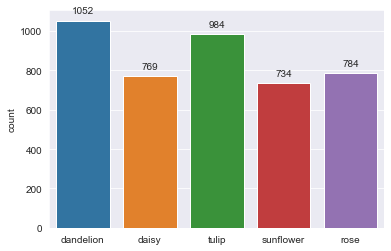

In [153]:
# Data Visualization

l = []
for i in data:
    l.append(labels[i[1]])
sns.set_style('darkgrid')
splot = sns.countplot(l)
for p in splot.patches:
    splot.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

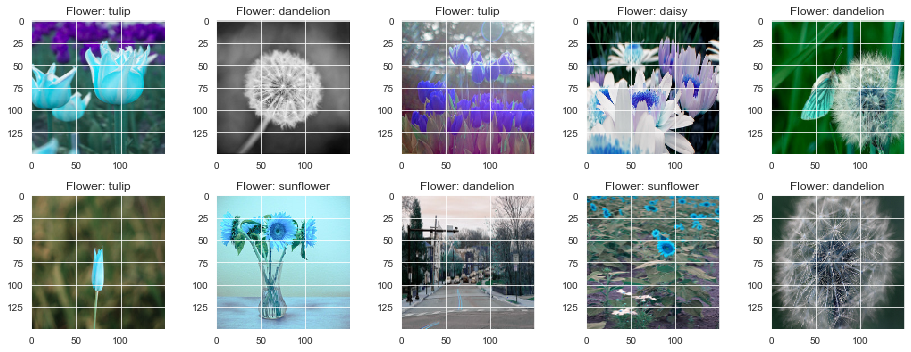

In [144]:
# Randomly Previewing first 10 images

fig,ax=plt.subplots(2,5)
fig.set_size_inches(13,5)

for i in range(2):
    for j in range (5):
        l=random.randint(0,len(data))
        ax[i,j].imshow(data[l][0])
        ax[i,j].set_title('Flower: '+labels[data[l][1]])
plt.tight_layout()

In [6]:
x = []
y = []

for feature, label in data:
    x.append(feature)
    y.append(label)

In [7]:
# We perform a grayscale normalization to reduce the effect of illumination's differences.
# Moreover the CNN converges faster on [0..1] data than on [0..255].

x = np.array(x) / 255                       # Normalize the data
x = x.reshape(-1, img_size, img_size, 3)    # Reshaping the data from 1-D to 3-D as required through input by CNN's 
y = np.array(y)

In [8]:
# Transfrom shape of class vector

from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)

In [10]:
# Divided train and test data

x_train,x_test,y_train,y_test = train_test_split(x , y , test_size = 0.2 , random_state = 0)

In [1]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        horizontal_flip = False,              # randomly flip images
        vertical_flip=False)                  # randomly flip images
datagen.fit(x_train)

NameError: name 'ImageDataGenerator' is not defined

In [12]:
# Customize the model

pre_trained_model = VGG16(input_shape=(150,150,3), include_top=False, weights="imagenet")
pre_trained_model.trainable = False
    
model = Sequential([
    pre_trained_model,
    MaxPool2D((2,2) , strides = 2),
    Flatten(),
    Dense(5 , activation='softmax')])
model.compile(optimizer = "adam" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 512)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 10245     
Total params: 14,724,933
Trainable params: 10,245
Non-trainable params: 14,714,688
_________________________________________________________________


In [13]:
# Train the moel

history = model.fit(datagen.flow(x_train,y_train, batch_size = 64) , epochs = 10 , validation_data = (x_test, y_test))

Epoch 1/10
55/55 [==============================] - 1022s 19s/step - loss: 1.1346 - accuracy: 0.5729 - val_loss: 0.8664 - val_accuracy: 0.6925
Epoch 2/10
55/55 [==============================] - 773s 14s/step - loss: 0.7721 - accuracy: 0.7230 - val_loss: 0.7672 - val_accuracy: 0.7318
Epoch 3/10
55/55 [==============================] - 907s 16s/step - loss: 0.6718 - accuracy: 0.7545 - val_loss: 0.7078 - val_accuracy: 0.7572
Epoch 4/10
55/55 [==============================] - 878s 16s/step - loss: 0.6129 - accuracy: 0.7753 - val_loss: 0.6722 - val_accuracy: 0.7607
Epoch 5/10
55/55 [==============================] - 709s 13s/step - loss: 0.5889 - accuracy: 0.7909 - val_loss: 0.6998 - val_accuracy: 0.7387
Epoch 6/10
55/55 [==============================] - 795s 14s/step - loss: 0.5435 - accuracy: 0.8022 - val_loss: 0.6545 - val_accuracy: 0.7746
Epoch 7/10
55/55 [==============================] - 696s 13s/step - loss: 0.5244 - accuracy: 0.8158 - val_loss: 0.6263 - val_accuracy: 0.7827
Epoch

In [15]:
# Evaluate loss and accuracy

print("Loss of the model is - " , model.evaluate(x_test,y_test)[0] , "%")
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

865/865 [==============================] - 192s 222ms/step
Loss of the model is -  0.621557734053948 %
865/865 [==============================] - 223s 258ms/step
Accuracy of the model is -  77.57225632667542 %


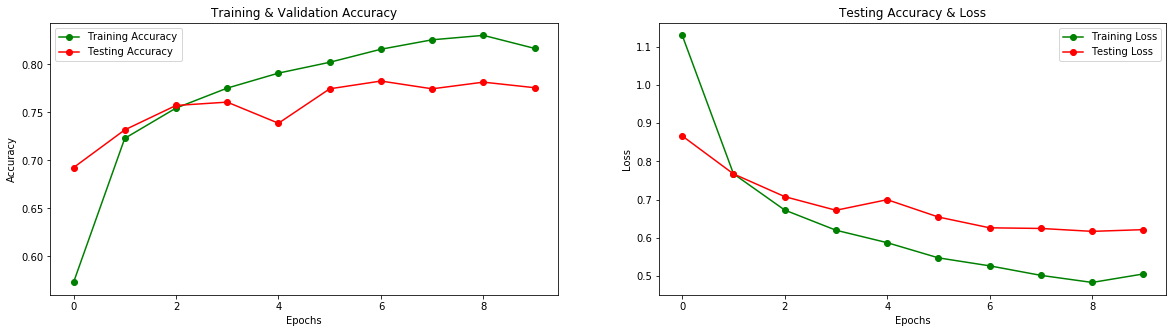

In [23]:
# Plot Training & Validation Accuracy/Loss

epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,5)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [129]:
# Get the predicted class vector

pred_cls = model.predict_classes(x_test)

In [130]:
# Get the probability of the predictions

pred_prop = model.predict(x_test)

In [131]:
# Convert the class array back to class vector 

y_test_inv = label_binarizer.inverse_transform(y_test)

In [132]:
# Classification report 

print(classification_report(y_test_inv, pred_cls, target_names = labels))

              precision    recall  f1-score   support

   dandelion       0.81      0.80      0.81       218
       daisy       0.79      0.74      0.77       150
       tulip       0.74      0.83      0.78       196
   sunflower       0.82      0.72      0.77       149
        rose       0.72      0.76      0.74       152

    accuracy                           0.78       865
   macro avg       0.78      0.77      0.77       865
weighted avg       0.78      0.78      0.78       865



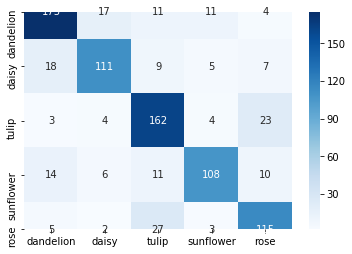

In [135]:
# Confusion matrix

cm = confusion_matrix(y_test_inv,pred_cls)
cm = pd.DataFrame(cm , index = labels , columns = labels)
sns.heatmap(cm,cmap= "Blues", annot = True, fmt='' , xticklabels = labels , yticklabels = labels)

In [136]:
# Get the first 10 correct and incorrect predictions

i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test_inv)):
    if(y_test_inv[i] == pred_cls[i]):
        prop_class.append(i)
    if(len(prop_class)==10):
        break

i=0
for i in range(len(y_test_inv)):
    if(y_test_inv[i] != pred_cls[i]):
        mis_class.append(i)
    if(len(mis_class)==10):
        break

In [137]:
# Convert BGR to RGB mode for displaying images

def cvtRGB(img):
    return cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)

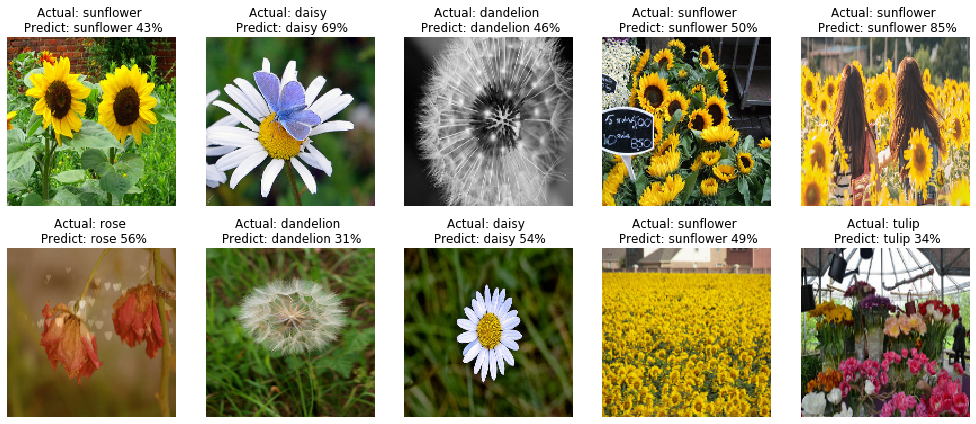

In [138]:
# Show 10 correct predictions

count=0
fig,ax=plt.subplots(2,5)
fig.set_size_inches(14,6)
for i in range (2):
    for j in range (5):
        img = cvtRGB(x_test[prop_class[count]].astype('float32'))
        actual = labels[y_test_inv[prop_class[count]]]
        predict = labels[pred_cls[prop_class[count]]]
        prob = round(np.max(pred_prop[mis_class[count]]),2)*100
        ax[i,j].imshow(img)
        ax[i,j].set_title('Actual: %s \n Predict: %s %d%%' % (actual, predict, prob))
        ax[i,j].set_axis_off()
        plt.tight_layout()
        count+=1

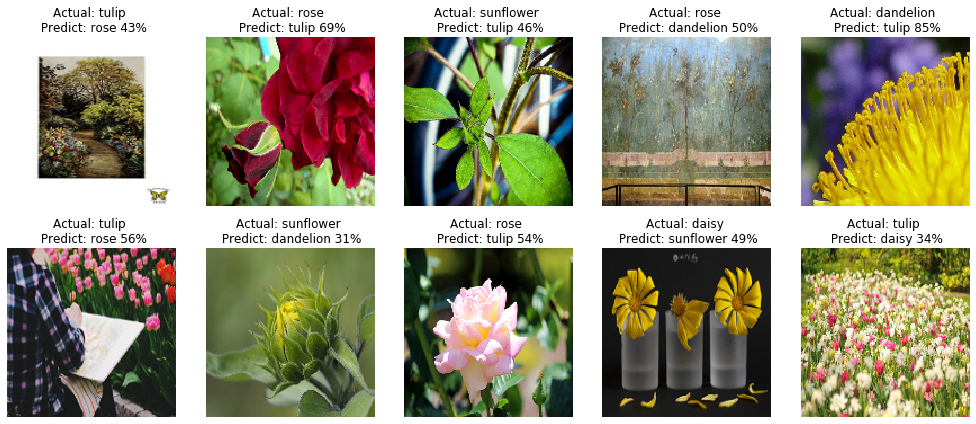

In [139]:
# Show 10 incorrect predictions

count=0
fig,ax=plt.subplots(2,5)
fig.set_size_inches(14,6)
for i in range (2):
    for j in range (5):
        img = cvtRGB(x_test[mis_class[count]].astype('float32'))
        actual = labels[y_test_inv[mis_class[count]]]
        predict = labels[pred_cls[mis_class[count]]]
        prob = round(np.max(pred_prop[mis_class[count]]),2)*100
        ax[i,j].imshow(img)
        ax[i,j].set_title('Actual: %s \n Predict: %s %d%%' % (actual, predict, prob))
        ax[i,j].set_axis_off()
        plt.tight_layout()
        count+=1